# Kaggle - Spotify data analysis

## Introduction

For the purposes of this project we are using the dataset [“🎹 Spotify Tracks Dataset”](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) from Kaggle. This dataset consists of a large list of songs from the popular streaming platform Spotify, along with 20 parameters describing each track. Our **goals** are to:

1. Build a model to predict danceability based on the song’s other parameters.

2. Find the most and least popular genres based on averages.

3. Find the parameters which affect the track’s popularity the most.

Our project could be of use to music producers to help make their next song a success (in terms of popularity). It could also be helpful to music platforms like Spotify to assist in generating better personalized playlists. Additionally the process of analyzing this data would develop our own data mining skills and help us consolidate what we have learned so far.


We switched the completion order of our goals to 2.>3.>1. to accommodate different methods.[]()

## **2. Goal - Find the most and least popular genres based on averages.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the data and removing duplicate values as well as not necessary columns/parameters.

In [2]:
data = pd.read_csv("dataset.csv")

data = data.drop_duplicates(subset = ["track_id"])

data = data.drop(data.columns[[0]], axis=1)
data = data.drop(['artists', 'track_id', 'track_name', 'album_name'], axis=1)



Finding the mean popularity values for each genre.

In [3]:
most_popular_genres_data = data[['popularity', 'track_genre']]

#most_popular_genres_data = pd.get_dummies(most_popular_genres_data, columns=['track_genre'])

average_popularity = {}
popularity_sum = {}
genre_count = {}

#Finding the sum of the popularity score and count of each genre.
for ind in most_popular_genres_data.index:
    genre = most_popular_genres_data['track_genre'][ind]
    popularity = most_popular_genres_data['popularity'][ind]
    
    if genre not in popularity_sum.keys():
        popularity_sum[genre] = popularity
        genre_count[genre] = 1
    else:
        popularity_sum[genre]+=popularity
        genre_count[genre]+=1

#Finding the average popularity of each genre.
for key in popularity_sum.keys():
    average_popularity[key] = popularity_sum[key]/genre_count[key]
        


Plotting 10 genres with the highest average popularity values.

<Figure size 900x400 with 0 Axes>

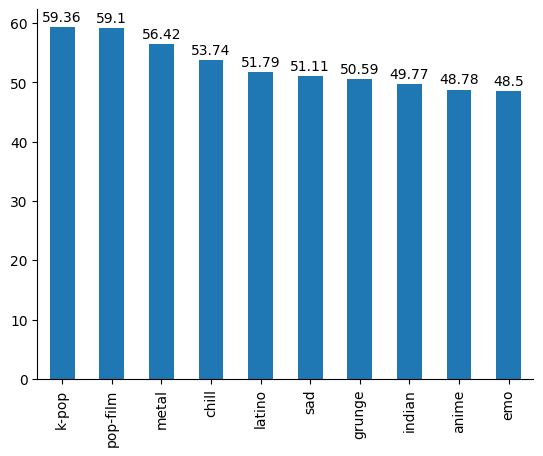

In [4]:
from operator import itemgetter

fig = plt.figure(figsize=(9, 4))

top_10_highest = dict(sorted(average_popularity.items(), key = itemgetter(1), reverse=True)[:10])

highest_10 = pd.DataFrame.from_dict(top_10_highest, orient="index")


ax = highest_10.plot(kind="bar")
plt.xticks(range(len(top_10_highest)), list(top_10_highest.keys()))

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.get_legend().remove()

i = 0
for key in top_10_highest.keys():
    plt.text(i, top_10_highest[key] + 1, round(top_10_highest[key], 2), ha = 'center')
    i+=1

plt.show()

### Method Selection Reasoning

We used mean as our chosen metric, because there were too many different potential popularity score values to use mode and because the values could vary too much to use median.


### **Analysis of the 2nd Goal's Results**

In our dataset about Spotify tracks the highest average popularity (on the scale of 0-100) among the 144 different genres is k-pop with a popularity score of 59.36, closely followed by pop-film (59.1). The 3rd highest popularity in our dataset belongs to the metal genre with average popularity of 56.42. The chill genre is in 4th place with average popularity of 53.74. 5th spot belongs to latino genre and has average popularity of 51.79, 6th place is held by “sad” with popularity of 51.11, 7th place belongs to “grunge” genre and has average popularity of 50.59. “Indian” music genre has the 8th place in our Spotify track dataset with average popularity of 49.77, followed by “anime” music genre that has the 9th place in our dataset with an average popularity of 48.78. Top 10 most popular track genres among our data is ended by “emo” music genre which has an average popularity of 48.5.


Plotting 10 genres with the lowest average popularity values.

<Figure size 1200x300 with 0 Axes>

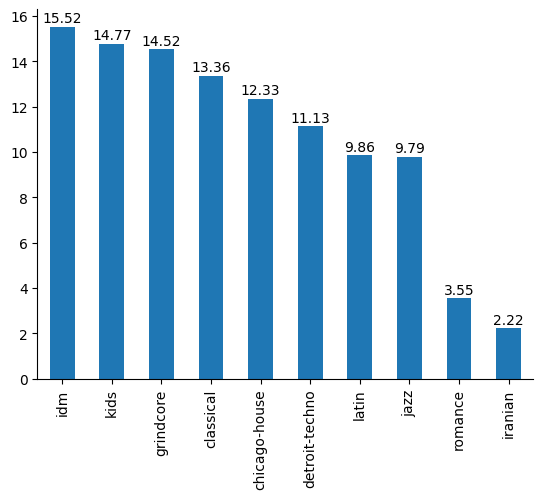

In [5]:
top_10_lowest = dict(sorted(average_popularity.items(), key = itemgetter(1), reverse=False)[:10])
fig = plt.figure(figsize=(12, 3))

top_10_lowest = dict(sorted(top_10_lowest.items(), key = itemgetter(1), reverse=True)[:10])

lowest_10 = pd.DataFrame.from_dict(top_10_lowest, orient="index")

ax = lowest_10.plot(kind="bar")
plt.xticks(range(len(top_10_lowest)), list(top_10_lowest.keys()))

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.get_legend().remove()

plt.xticks(range(len(top_10_lowest)), list(top_10_lowest.keys()), rotation='vertical')

i = 0
for key in top_10_lowest.keys():
    plt.text(i, top_10_lowest[key]+0.2, round(top_10_lowest[key], 2), ha = 'center')
    i+=1
    
plt.show()

### **Additional Analysis**

When we sorted our data by the average popularity and took the genres that had the lowest popularity we found out that the genre with the title of the average lowest popularity score in our Spotify track dataset belongs to “iranian”, which has the average popularity of 2.22. This could be caused by the genre itself being somewhat limited to a single nation with a minorly prominent culture sphere. “Romance” came in second with an average popularity score of 3.55. After these the average score rises dramatically with the “jazz” genre, which has an average popularity score 2.76 times higher than “romance”. That gives it an average popularity of 9.79. The 4th lowest score in the dataset belongs to “latin” and it is a little higher than the 3rd place holder, having an average popularity of 9.86. The 5th lowest genre in our dataset is “detroit-techno” with a score of 11.13, followed by “chicago-house” in 6th place with an average popularity of 12.33. 7th place belongs to the “classical” genre which has an average popularity score of 13.96.

## **3. Goal: Find the parameters which affect the track’s popularity the most.**

Plotting 14 graphs, each with a different parameter on the x axis and popularity on the y axis. This is done to see whether  patterns can be observed.

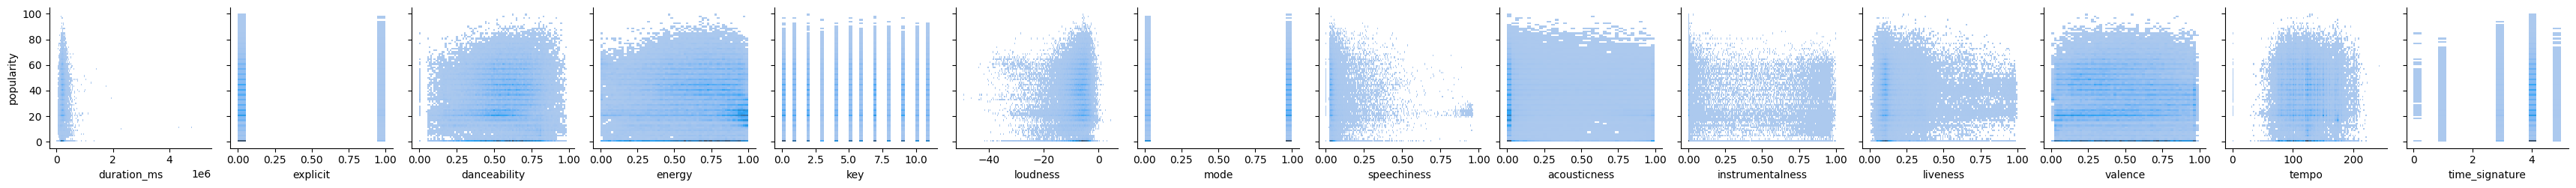

In [6]:
import seaborn as sns

sns.pairplot(data, x_vars = ["duration_ms", "explicit", "danceability",
                            "energy", "key", "loudness", "mode", "speechiness", 
                             "acousticness", "instrumentalness", "liveness", 
                             "valence", "tempo", "time_signature"], 
             y_vars = ["popularity"], kind='hist')
plt.show()


Finding the correlation values between all attributes.

In [7]:
correlations = data.corr()['popularity']

Plotting the correlation values between popularity and every other (potentially relevant) attribute.

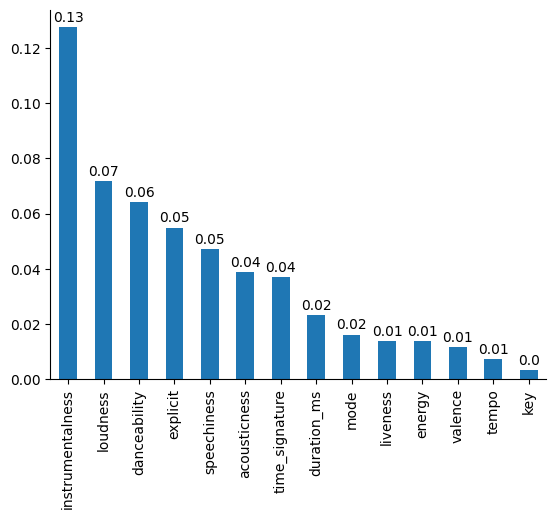

In [8]:
correlations = correlations.abs()
correlations = correlations.drop(['popularity'], axis=0)
correlations = correlations.sort_values(ascending = False)
ax = correlations.plot(kind='bar')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

i = 0
for key in correlations.keys():
    plt.text(i, correlations[key]+0.002, round(correlations[key], 2), ha = 'center')
    i+=1

plt.show()


### Method Selection Reasoning

We chose to use correlation as our metric since it encapsulates our goal the most accurately. Two parameters being correlated does not necessarily mean that one parameter is affecting the other, but it does show that they could be in a (statistical) relationship.

### **Analysis of the 3rd Goal's Results**

After sorting the correlation values we found that the one with the highest correlation with "popularity" was "instrumentalness", which had a value of 0.13. We suspect this could be caused by popular songs having an instrumental backing track, making them sound more full and catchy. The second most correlated was "loudness", which scored 0.07 - almost half the correlation of the first ranked parameter. "danceability" came third with a correlation value of 0.06. The 4th most correlated attribute was "explicit", which had a value of 0.05. Next came "acousticness" and "time_signature", both of which rounded out to 0.04. "duration_ms", "mode", "liveness", "energy", "valence", "tempo" and "key" all had correlation values below 0.03. Overall, we didn't find strong correlations between popularity and the other parameters, however the first 2 or 3 could be considered as somewhat effective descriptions of many popular songs on Spotify.

Finding which parameters are most correlated with the popularity of k-pop.

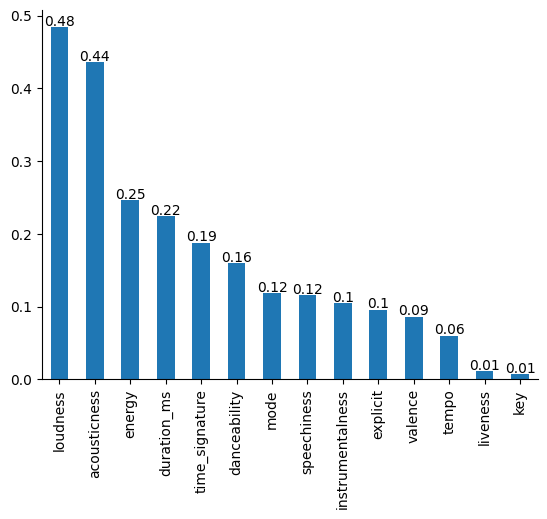

In [9]:
def correlations(dataset):
    correlations = dataset.corr()['popularity']

    correlations = correlations.abs()
    correlations = correlations.drop(['popularity'], axis=0)
    correlations = correlations.sort_values(ascending = False)
    ax = correlations.plot(kind='bar')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    i = 0
    for key in correlations.keys():
        plt.text(i, correlations[key]+0.002, round(correlations[key], 2), ha = 'center')
        i+=1

    plt.show()

kpop_data = data.query("track_genre == 'k-pop'")

correlations(kpop_data)

Finding which parameters are most correlated with the popularity of "kids".

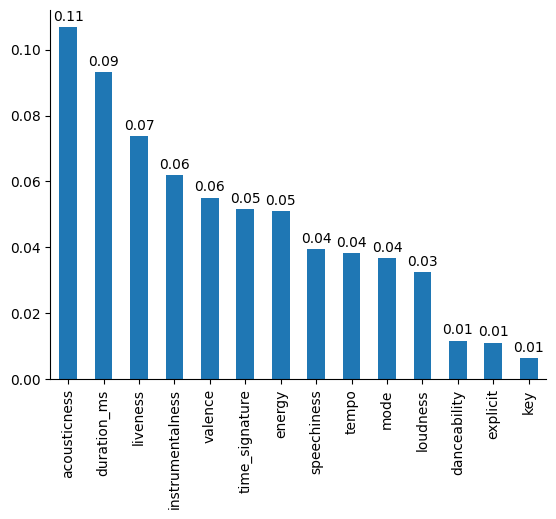

In [10]:
kids_data = data.query("track_genre == 'kids'")

correlations(kids_data)

Finding which parameters are most correlated with the popularity of "sad".

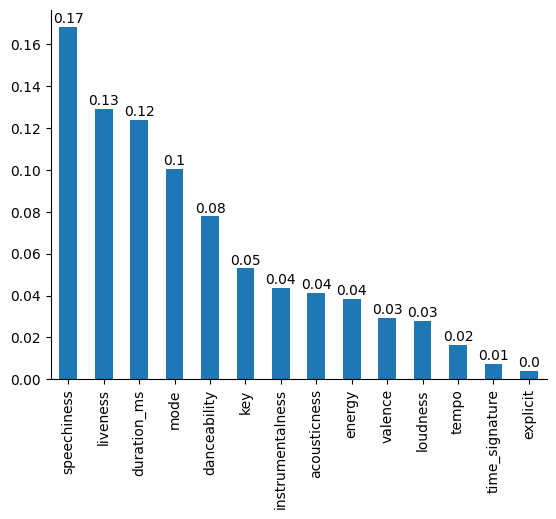

In [11]:
sad_data = data.query("track_genre == 'sad'")

correlations(sad_data)

### **Additional Analysis**

We decided to find the correlations a between specific genre's track's parameters and it's popularity. We discovered a wide range of correlations. For example, the parameter with the overall highest correlation with "popularity" is "instrumentalness", but when including only tracks from the genre "sad", the highest scoring parameter is "speechiness". In the genre "kids" the highest correlated parameter is "acousticness" and in genre "k-pop" the highest is "loudness". In comparison between different genres the correlations with popularity are quite different.
The knowledge aquired by analyzing genre-specific situations is more useful, since it could have a more immediate practical use.

**1. Goal - Build a model to predict danceability based on the song’s other parameters**

Employing one-hot encoding on "explicit", "track_genre", "key" and "time_signature".

In [12]:
data["explicit"] = (data["explicit"] == True).astype(int)
data["explicit"].value_counts()

data_oh = pd.get_dummies(data, columns=['track_genre', 'key', 'time_signature'])

Splitting the dataset into training data and test data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_oh.drop("danceability", axis = 1), data["danceability"], train_size = 0.75, random_state = 1)


Testing different regression methods and trying to find the best one.

In [14]:
#Some inspiration was gathered from HW7.
#Currently using all potentially relevant parameters:

from sklearn.linear_model import LinearRegression, Ridge, Lasso

def MSE(y_target, y_pred):
    return sum([(target - pred)**2 for target, pred in zip(y_target, y_pred)]) / len(y_target)


linear = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

linear_predicted = linear.predict(X_test)
ridge_predicted = ridge.predict(X_test)
lasso_predicted = lasso.predict(X_test)

linear_MSE = MSE(y_test, linear_predicted)
ridge_MSE = MSE(y_test, ridge_predicted)
lasso_MSE = MSE(y_test, lasso_predicted)

print("Linear regression MSE:", linear_MSE)
print("Ridge regression MSE:", ridge_MSE)
print("Lasso regression MSE:", lasso_MSE)

Linear regression MSE: 0.013210771887453752
Ridge regression MSE: 0.013210629718975029
Lasso regression MSE: 0.03117726353557437


(Random forest regression is separated from the others because of it's long runtime)

In [15]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 1).fit(X_train, y_train)

In [16]:
rgr_predicted = model.predict(X_test)

rgr_MSE = MSE(y_test, rgr_predicted)

print("Random forest regression MSE:", rgr_MSE)

Random forest regression MSE: 0.010965834455170229


Trying the Random Forest Regression method without "popularity" as a parameter

In [35]:
#Without popularity

X_train, X_test, y_train, y_test = train_test_split(data_oh.drop(["danceability", "popularity"], axis = 1), data["danceability"], train_size = 0.75, random_state = 1)

In [36]:
#RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 1).fit(X_train, y_train)

rgr_predicted = model.predict(X_test)

rgr_MSE = MSE(y_test, rgr_predicted)

print("Random forest regression MSE (without popularity):", rgr_MSE)


Random forest regression MSE (without popularity): 0.01262707002197358


Finding which parameters are most correlated with "danceability".

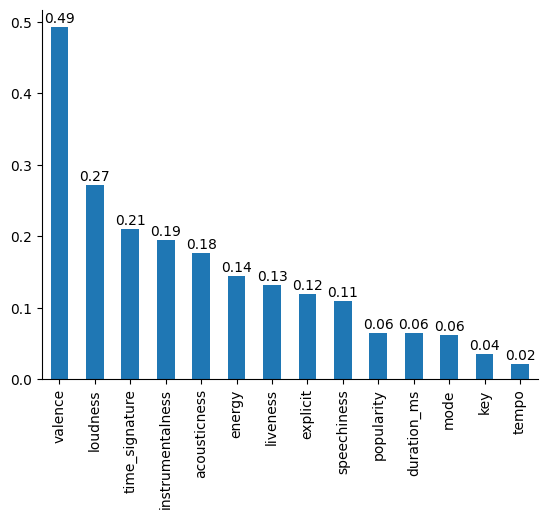

In [19]:
correlations = data.corr()['danceability']

correlations = correlations.abs()
correlations = correlations.drop(['danceability'], axis=0)
correlations = correlations.sort_values(ascending = False)

ax = correlations.plot(kind='bar')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

i = 0
for key in correlations.keys():
    plt.text(i, correlations[key]+0.006, round(correlations[key], 2), ha = 'center')
    i+=1

Defining a function to return the mean squared error of the random forest method with n most correlated parameters.

In [32]:
def random_forest_mse(n_parameters):
    parameters = []
    
    all_parameters = sorted(correlations.items(), key = itemgetter(1), reverse=True)
    
    for i in range(n_parameters):
        parameters.append(all_parameters[i][0])
    
    parameters.append('danceability')
    
    #print(parameters)
    
    data_rf = data[parameters]

    X_train, X_test, y_train, y_test = train_test_split(data_rf.drop(["danceability"], axis = 1), data_rf["danceability"], train_size = 0.75, random_state = 1)

    #RandomForestRegressor
    model = RandomForestRegressor(n_estimators = 10, random_state = 1).fit(X_train, y_train)

    rgr_predicted = model.predict(X_test)

    rgr_MSE = MSE(y_test, rgr_predicted)

    return rgr_MSE



Using the previously defined function to find the mean squared error of random forest regression using 1-14 of the most correlated parameters.

In [33]:
errors = {}
    
for i in range(1,len(correlations)+1):
    errors[i] = random_forest_mse(i)


Plotting the results.

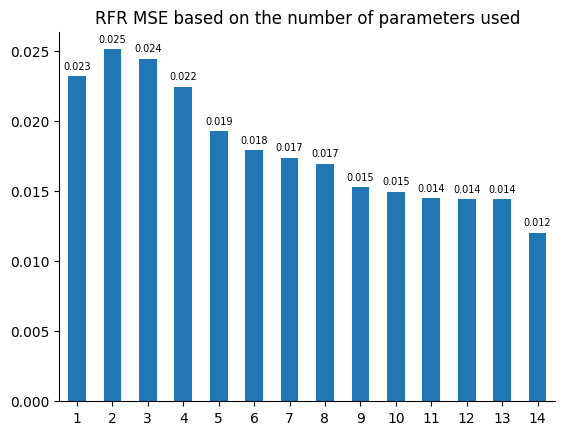

In [34]:
df = pd.DataFrame.from_dict(errors, orient="index")

ax = df.plot(kind='bar')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.get_legend().remove()

plt.xticks(rotation='horizontal')

i = 0
for i in range(1,len(errors)+1):
    plt.text(i-1, errors[i]+0.0005, round(errors[i], 3), ha = 'center', size='7')
    i+=1

plt.title("RFR MSE based on the number of parameters used")    

plt.show()

### Method Selection Reasoning

We used regression methods, because we were looking to utilize relationships between "danceability" and other variables to predict a song's "danceability". For this purpose, generally regression analysis methods are used. We tested linear regression, ridge regression, lasso regression and random forest regression. We decided on random forest regression, because it provided the best results out of the bunch. Later we tried differing amounts of variables most correlated with a track's "danceability" to find which were the most effective.

### **Analysis of the 1st Goal's Results**

The most effective method turned out to be random forest regression. The model provided the best result, when it was given all available parameters to base it's prediction on. The best MSE we got was 0.012. We suspect that our results turned out relatively well, because the "danceability" parameter was created by analyzing a track's other parameters. These are also most likely the same parameters we also took into account during our prediction. The parameter with the highest correlation to "danceability" turned out to be "valence" with a correlation score of 0.49.